In [1]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def load_myCat_as_dataframe(catname):
    foldername = (catname)
    filenames = glob.glob('{}/*.jpg'.format(foldername))
    
    images = []

    for filename in filenames:
        img = cv2.imread(filename,0)

        #reshape image
        r = 200.0 / img.shape[1]
        dim = (200, int(img.shape[0] * r))
        resized_img = cv2.resize(img, dim).reshape(1,-1)
        images.append(pd.DataFrame(resized_img))
    
    return pd.concat(images).reset_index(drop=True)

In [3]:
claudia = load_myCat_as_dataframe('Claudia')
claudia['label'] = 0

In [4]:
lucy = load_myCat_as_dataframe('Claudia')
lucy['label'] = 1

In [5]:
dataset = pd.concat([claudia,lucy]).sample(frac=1).reset_index(drop=True)

In [6]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,53191,53192,53193,53194,53195,53196,53197,53198,53199,label
0,182,181,177,175,170,170,169,172,173,172,...,206,206,208,209,208,209,207,209,213,1
1,239,237,237,236,237,234,233,232,233,235,...,37,40,41,47,41,33,35,32,34,1
2,22,25,24,24,27,20,13,12,52,55,...,3,2,3,5,5,4,2,3,2,0
3,166,165,163,164,166,164,162,162,161,158,...,236,236,236,234,219,178,239,231,229,1
4,172,166,157,161,167,168,170,163,160,157,...,200,200,200,202,199,203,198,204,203,0
5,80,97,58,60,77,87,87,122,110,125,...,199,199,199,199,199,201,200,201,198,0
6,191,190,189,190,191,188,188,192,187,182,...,215,215,214,212,217,213,214,215,214,1
7,5,5,27,45,51,54,53,53,57,60,...,44,42,41,51,60,66,54,44,43,0
8,164,163,163,162,165,164,164,166,167,167,...,177,177,179,179,181,178,179,177,180,0
9,166,165,163,164,166,164,162,162,161,158,...,236,236,236,234,219,178,239,231,229,0


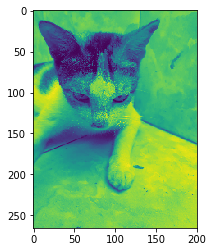

In [7]:
plt.imshow(dataset.iloc[10,:-1].values.reshape(266,200))